In [88]:
# Importando as bibliotecas
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-88-6eccd4eda469>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [135]:
# Criando o Dataframe
df = pd.read_excel('dataset/AdventureWorks.xlsx')

In [37]:
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [8]:
df.shape

(904, 16)

In [9]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [10]:
# Qual é a receita total?
round(df['Valor Venda'].sum(), 2)

5984606.14

In [90]:
# Qual é o custo do produto?

df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [12]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
561,2008-07-24,2008-08-03,199,384,18856,200807243CS645,348.58,758.0,8,606.4,5457.6,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2788.64
817,2009-11-14,2009-11-23,199,384,19015,200911143CS930,348.58,758.0,6,909.6,3638.4,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
48,2008-05-16,2008-05-22,306,1203,19052,200805164CS576,324.69,980.0,6,0.0,5880.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14


In [39]:
#Qual é o custo total?

df['Custo'].sum()

2486783.05

In [14]:
# Qual é o lucro total?

round(df['Valor Venda'].sum() - df['Custo'].sum(), 2)

3497823.09

In [91]:
# Criando uma coluna Lucro
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [92]:
# Criando uma coluna para tempo de envio

df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.sample(3)


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
898,2009-06-25,2009-07-06,307,1155,19127,200906254CS717,324.69,980.00,6,588.00,"5,292.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,343.86",11
226,2009-07-19,2009-08-01,307,1178,19129,200907194CS719,330.66,998.00,8,0.00,"7,984.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"2,645.28","5,338.72",13
140,2009-04-08,2009-04-12,199,366,18930,200904083CS839,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"2,091.48","2,456.52",4


In [93]:
# Média de tempo de envio por marca
df.groupby(['Marca'])['Tempo Envio'].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio, dtype: float64

In [94]:
# Média de tempo de envio por marca/produto/Classe/Cor
df.groupby(['Marca', 'Produto', 'Classe', 'Cor'])['Tempo Envio'].mean()

Marca            Produto                                          Classe   Cor   
Adventure Works  Adventure Works Laptop15.4W M1548 Black          Regular  Black                    8.30
                 Adventure Works Laptop15.4W M1548 Red            Regular  Red                      9.05
Contoso          Headphone Adapter for Contoso Phone E130 Silver  Economy  Silver                   8.30
                 Headphone Adapter for Contoso Phone E130 White   Economy  White                    8.65
Fabrikam         Fabrikam Trendsetter 1/3'' 8.5mm X200 Black      Regular  Black                    8.67
                 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey       Regular  Grey                     8.26
                 Fabrikam Trendsetter 1/3'' 8.5mm X200 White      Regular  White                    8.69
                 Fabrikam Trendsetter 2/3'' 17mm X100 Black       Regular  Black                    8.17
                 Fabrikam Trendsetter 2/3'' 17mm X100 Grey        Regular  Gre

In [31]:
# Verificar se existem valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Tempo Envio       0
dtype: int64

# Como mostrar lucro por marca

In [95]:
df.groupby([(df['Data Venda']).dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [96]:
pd.options.display.float_format = '{:20,.2f}'.format

In [97]:
df.groupby([(df['Data Venda']).dt.year, 'Marca'])['Tempo Envio'].sum()

Data Venda  Marca          
2008        Adventure Works     881
            Contoso             669
            Fabrikam           2357
2009        Adventure Works    1181
            Contoso             788
            Fabrikam           1847
Name: Tempo Envio, dtype: int64

In [98]:
# Guardar as informações de lucro por marca

lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()

In [99]:
# Guardar as informações de dias para envio por marca

tempo_envio_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Tempo Envio'].sum().reset_index()

In [100]:
# Qual o total de produtos vendidos, ordenados por qtd?

df.groupby(['Produto'])['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

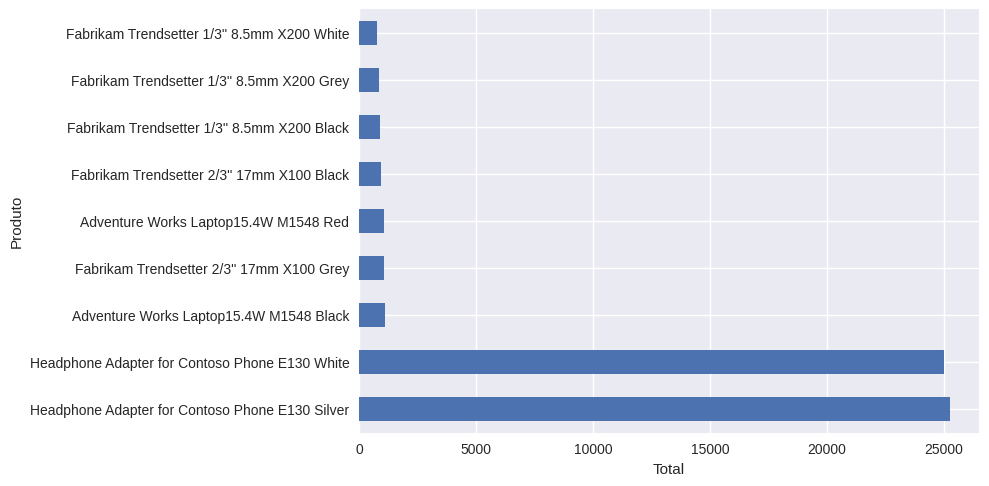

In [101]:
# Gráfico total de produtos vendidos

df.groupby(['Produto'])['Quantidade'].sum().sort_values(ascending=False).plot.barh('Total Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produto')

Text(0, 0.5, 'Quantidade')

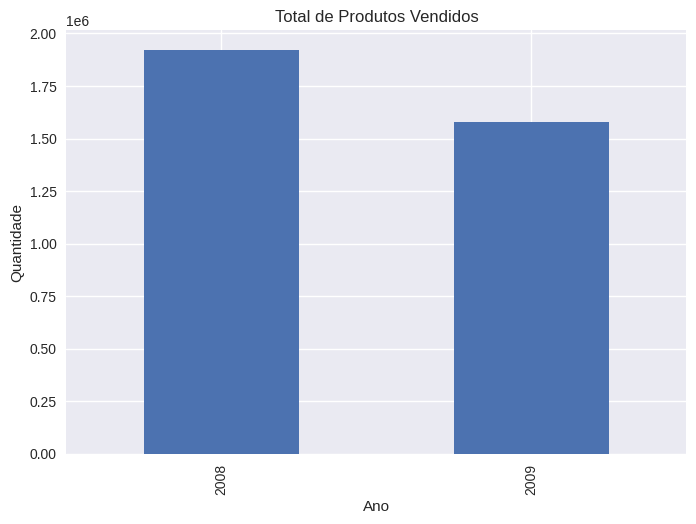

In [103]:
df.groupby([df['Data Venda'].dt.year])['Lucro'].sum().plot.bar(title='Total de Produtos Vendidos')

plt.xlabel('Ano')
plt.ylabel('Quantidade')

In [104]:
# Agora quero analisar somente as vendas do ano de 2009

dt_2009 = df.loc[df['Data Venda'].dt.year == 2009]

In [81]:
dt_2009.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
350,2009-03-31,2009-04-13,307,1203,19119,200903314CS709,324.69,980.00,12,"2,352.00","9,408.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"3,896.28","5,511.72",13


Text(0, 0.5, 'Lucro')

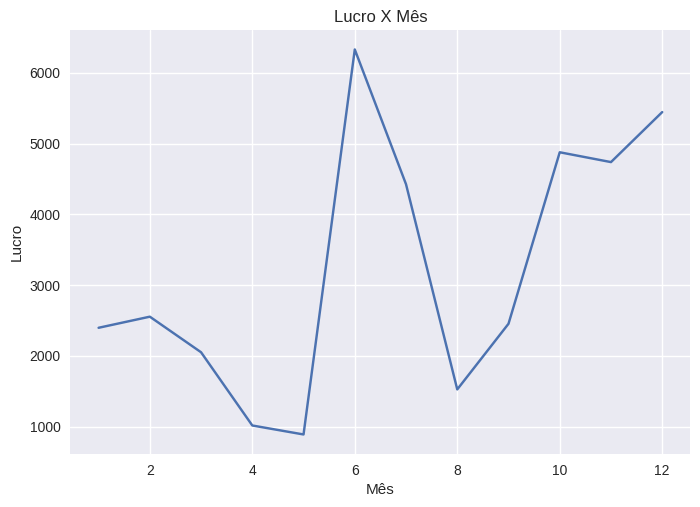

In [110]:
dt_2009.groupby([df['Data Venda'].dt.month])['Quantidade'].sum().plot(title='Lucro X Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')

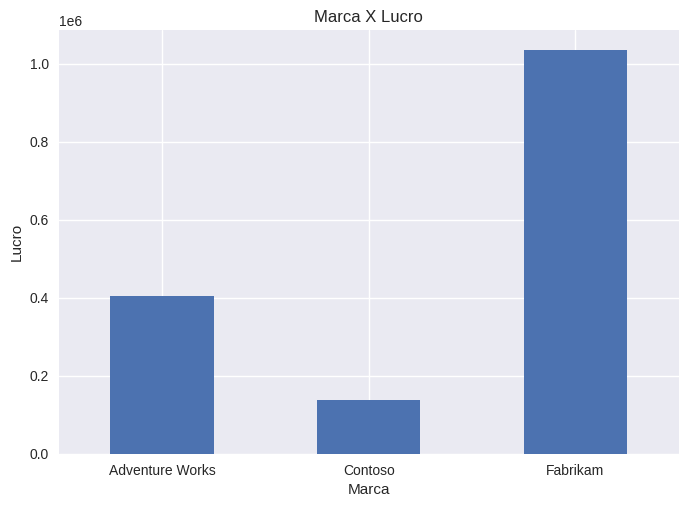

In [121]:
dt_2009.groupby(['Marca'])['Lucro'].sum().plot.bar(title='Marca X Lucro')
plt.xlabel("Marca")
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

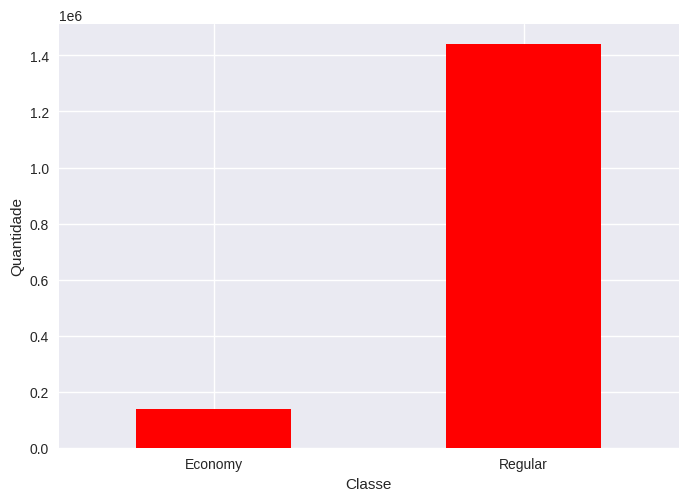

In [128]:
dt_2009.groupby(['Classe'])['Lucro'].sum().plot.bar(color='red')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

In [131]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7edb95fa8580>,
 'caps': [<matplotlib.lines.Line2D at 0x7edb91c9aaa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7edb9193df60>],
 'medians': [<matplotlib.lines.Line2D at 0x7edb91789a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7edb917895a0>],
 'means': []}

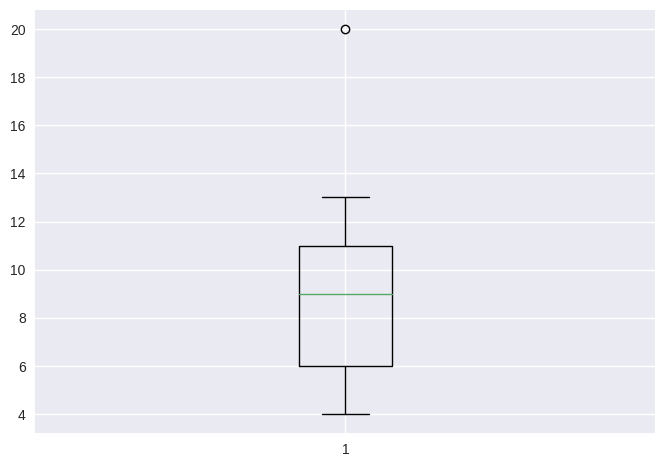

In [129]:
# Gráfico boxplot
plt.boxplot(df['Tempo Envio'])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

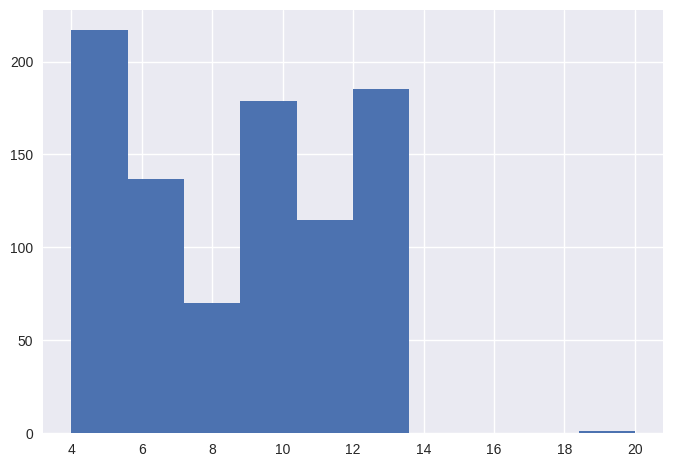

In [132]:
# Gráfico hist
plt.hist(df['Tempo Envio'])

In [133]:
df.to_csv('df_vendas_novo.csv', index = False)